In [0]:
import tensorflow as tf

In [0]:
from sklearn.preprocessing import StandardScaler
from math import sqrt

def normalisation(trainData, testData):
    scaler = StandardScaler()
    if not isinstance(trainData[0], list):
        #encode each sample into a list
        trainData = [[d] for d in trainData]
        testData = [[d] for d in testData]
        
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
        
        #decode from list to raw values
        normalisedTrainData = [el[0] for el in normalisedTrainData]
        normalisedTestData = [el[0] for el in normalisedTestData]
    else:
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
    return normalisedTrainData, normalisedTestData
    

In [0]:
from sklearn.utils import shuffle
from sklearn.datasets import load_iris
irisDataset = load_iris()

irisData, irisLabels = shuffle(irisDataset.data, irisDataset.target)
oneHotLabels = tf.keras.utils.to_categorical(irisLabels, 3)
irisLabels = oneHotLabels

trainSize = int(0.8 * len(irisData))
irisTrainData = irisData[:trainSize]
irisTrainLabels = irisLabels[:trainSize]

irisValidationData = irisData[trainSize:]
irisValidationLabels = irisLabels[trainSize:]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(irisTrainData)
irisTrainData = scaler.transform(irisTrainData)
irisValidationData = scaler.transform(irisValidationData)


In [88]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(2, input_dim = 4, activation = tf.nn.relu),
  tf.keras.layers.Dense(3, activation=tf.nn.softmax),
])

model.compile(optimizer=tf.keras.optimizers.SGD(),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=['accuracy'])
model.summary()

print('# Fit model on training data ')
history = model.fit(irisTrainData, irisTrainLabels, batch_size=10, epochs=10)
print('\nhistory dict:', history.history)

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_88 (Dense)             (None, 3)                 9         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
# Fit model on training data 
Epoch 1/10
12/12 [==============================] - 0s 1ms/step - loss: 1.0935 - accuracy: 0.4333
Epoch 2/10
12/12 [==============================] - 0s 1ms/step - loss: 1.0569 - accuracy: 0.5000
Epoch 3/10
12/12 [==============================] - 0s 1ms/step - loss: 1.0248 - accuracy: 0.5583
Epoch 4/10
12/12 [==============================] - 0s 1ms/step - loss: 0.9946 - accuracy: 0.6500
Epoch 5/10
12/12 [==============================] - 0s 1ms/step - loss: 0.9676 - accuracy: 0.6667

In [89]:
model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(2, input_dim = 4, activation = tf.nn.relu),
  tf.keras.layers.Dense(8, activation = tf.nn.relu),
  tf.keras.layers.Dense(3, activation=tf.nn.softmax),
])

model2.compile(optimizer=tf.keras.optimizers.SGD(),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=['accuracy'])
history2 = model2.fit(irisTrainData, irisTrainLabels, batch_size=10, epochs=10)

Epoch 1/10
12/12 [==============================] - 0s 1ms/step - loss: 1.0448 - accuracy: 0.4333
Epoch 2/10
12/12 [==============================] - 0s 1ms/step - loss: 1.0310 - accuracy: 0.5250
Epoch 3/10
12/12 [==============================] - 0s 1ms/step - loss: 1.0167 - accuracy: 0.5583
Epoch 4/10
12/12 [==============================] - 0s 1ms/step - loss: 1.0013 - accuracy: 0.6083
Epoch 5/10
12/12 [==============================] - 0s 1ms/step - loss: 0.9853 - accuracy: 0.6167
Epoch 6/10
12/12 [==============================] - 0s 1ms/step - loss: 0.9683 - accuracy: 0.6333
Epoch 7/10
12/12 [==============================] - 0s 1ms/step - loss: 0.9501 - accuracy: 0.6500
Epoch 8/10
12/12 [==============================] - 0s 1ms/step - loss: 0.9315 - accuracy: 0.6583
Epoch 9/10
12/12 [==============================] - 0s 1ms/step - loss: 0.9126 - accuracy: 0.6750
Epoch 10/10
12/12 [==============================] - 0s 1ms/step - loss: 0.8932 - accuracy: 0.6833


Text(0, 0.5, 'Loss & acc')

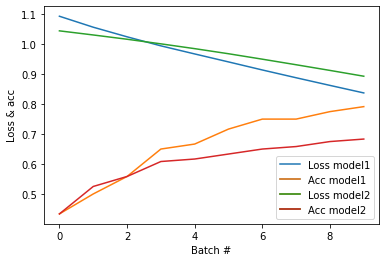

In [90]:
import matplotlib.pyplot as plt

loss1, = plt.plot(history.history['loss'], label = 'loss model1')
acc1, = plt.plot(history.history['accuracy'], label = 'acc model1')

loss2, = plt.plot(history2.history['loss'], label = 'loss model2')
acc2, = plt.plot(history2.history['accuracy'], label = 'acc model2')
plt.legend([loss1, (loss1, acc1), (loss1, acc1, loss2), (loss1, acc1, loss2, acc2)], ['Loss model1', 'Acc model1', 'Loss model2', 'Acc model2'])
plt.xlabel('Batch #')
plt.ylabel('Loss & acc for training')


In [91]:
validationLoss1, validationAcc1 = model.evaluate(irisValidationData, irisValidationLabels, verbose=2)
validationLoss2, validationAcc2 = model2.evaluate(irisValidationData, irisValidationLabels, verbose=2)


1/1 - 0s - loss: 0.7677 - accuracy: 0.9000
1/1 - 0s - loss: 0.8057 - accuracy: 0.8000


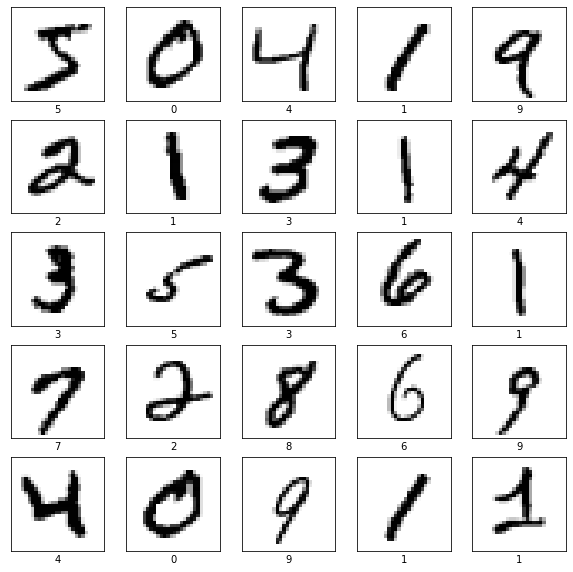

In [107]:
# CNN example

# load data
mnist = tf.keras.datasets.mnist
(trainImages, trainLabels), (validationImages, validationLabels) = mnist.load_data()

# normalise
trainImages, validationImages = trainImages / 255, validationImages / 255

# transform labels into one-hot encoding
trainLabels1hot = tf.keras.utils.to_categorical(trainLabels, 10)
validationLabels1hot = tf.keras.utils.to_categorical(validationLabels, 10)


class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainImages[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainLabels[i]])
plt.show()


In [169]:
modelANN = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

modelANN.summary()

modelANN.compile(optimizer=tf.keras.optimizers.SGD(),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=['accuracy'])
historyANN = modelANN.fit(trainImages, trainLabels1hot, batch_size=128, epochs=10)

Model: "sequential_93"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_43 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_190 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_191 (Dense)            (None, 32)                4128      
_________________________________________________________________
dense_192 (Dense)            (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 1.3553 - accuracy: 0.6321
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.5515 - accuracy: 0.8579
Epoch 3/10
469/469 [=========================

In [167]:
# input image dimensions
img_rows, img_cols = 28, 28
trainImages = trainImages.reshape(trainImages.shape[0], img_rows, img_cols, 1)
validationImages = validationImages.reshape(validationImages.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

modelCNN = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(10, activation='softmax')
])

modelCNN.summary()

modelCNN.compile(optimizer=tf.keras.optimizers.SGD(),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=['accuracy'])

historyCNN = modelCNN.fit(trainImages, trainLabels1hot, batch_size=128, epochs=10)

Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_41 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_185 (Dense)            (None, 128)               1179776   
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)             

Text(0, 0.5, 'Loss & acc')

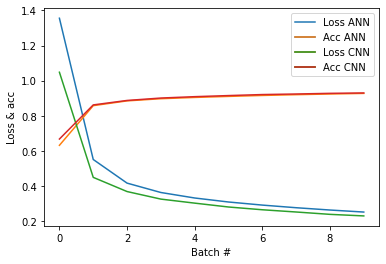

In [170]:
import matplotlib.pyplot as plt

loss1, = plt.plot(historyANN.history['loss'], label = 'loss ANN')
acc1, = plt.plot(historyANN.history['accuracy'], label = 'acc ANN')

loss2, = plt.plot(historyCNN.history['loss'], label = 'loss CNN')
acc2, = plt.plot(historyCNN.history['accuracy'], label = 'acc CNN')
plt.legend([loss1, (loss1, acc1), (loss1, acc1, loss2), (loss1, acc1, loss2, acc2)], ['Loss ANN', 'Acc ANN', 'Loss CNN', 'Acc CNN'])
plt.xlabel('Batch #')
plt.ylabel('Loss & acc of training')